STEP 1: IMPORT LIBRARIES

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

STEP 2: LOADING DATA

In [34]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

STEP 3: EXPLORE DATA

In [35]:
print("First 3 rows of the data:")
print(df.head(3))
print()
print("Basic information of the data:")
print(df.info())
print()
print(df.isnull().sum())

First 3 rows of the data:
   age   sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52  Male  Typical angina                     125          212   
1   53  Male  Typical angina                     140          203   
2   70  Male  Typical angina                     145          174   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      3.1    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Rev

STEP 4: EXPLORATORY DATA ANALYSIS (EDA)

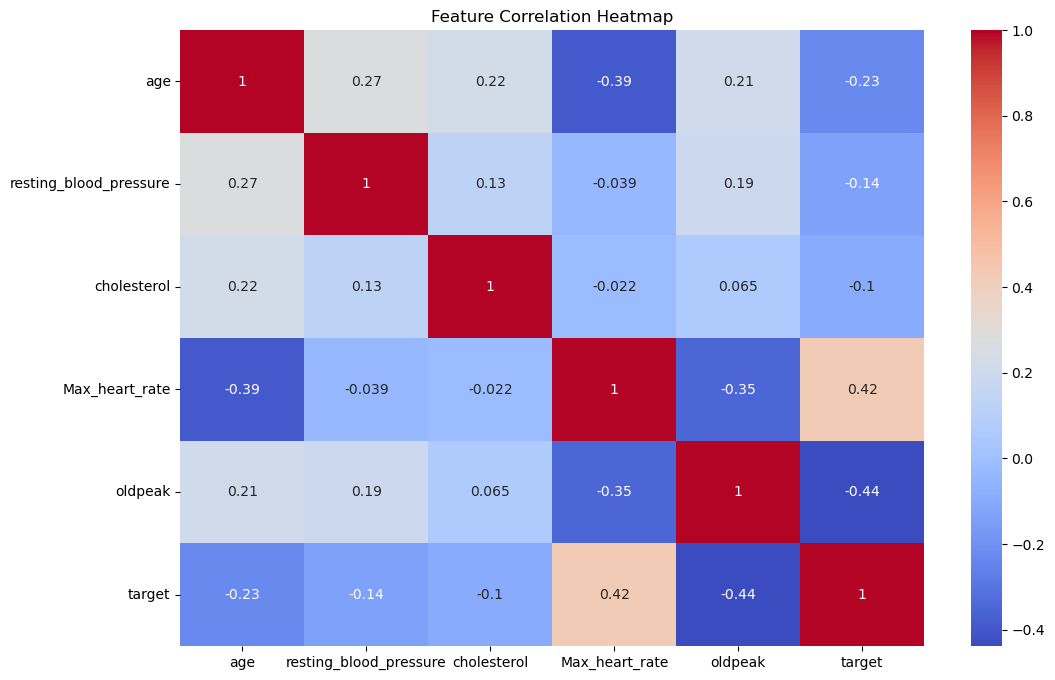

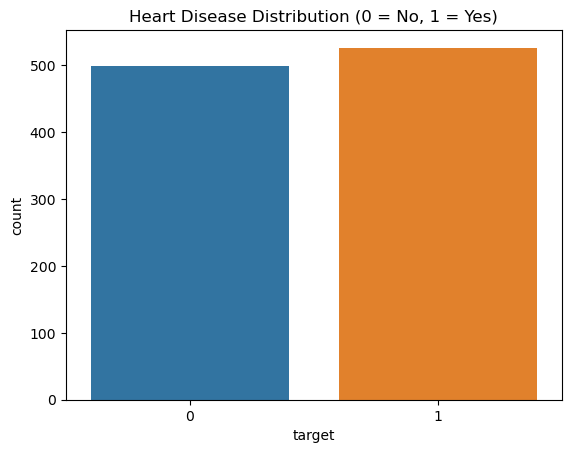

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Class balance
sns.countplot(data=df, x='target')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


STEP 5: DATA ENCODING

In [71]:
def dataEncoder(cols):
    for i in cols:
        dataLabelEncoder = LabelEncoder()
        df[i] = dataLabelEncoder.fit_transform(df[i])

columns = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','Max_heart_rate','slope','vessels_colored_by_flourosopy','thalassemia']
dataEncoder(columns)

STEP 6: TRAIN/tEST SPLIT

In [74]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP 7: MODEL TRAINING

LOGISTIC REGRESSION MODEL

In [75]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

STEP 8: EVALUATION

ACCURACY

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Accuracy: 0.7804878048780488


CONFUSION MATRIX

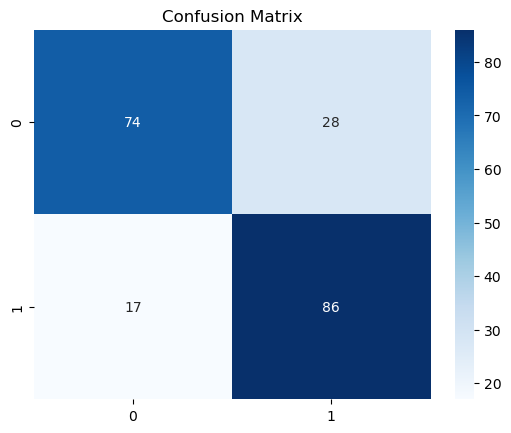

In [78]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

CLASSIFICATION REPORT

In [79]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       102
           1       0.75      0.83      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



ROC CURVE

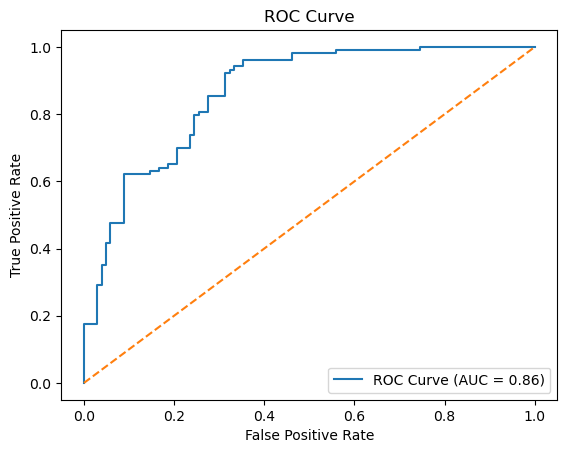

In [80]:
y_probs = lr.predict_proba(X_test)[:, 1]  # Use lr or dt
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

STEP 9: FEATURE IMPORTANCE

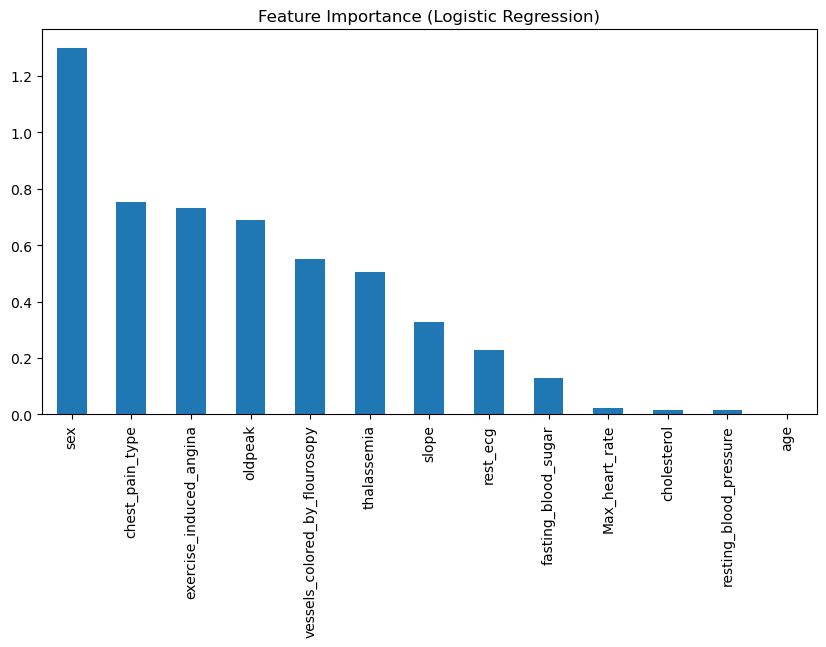

In [81]:
importance = pd.Series(abs(lr.coef_[0]), index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance (Logistic Regression)")
plt.show()